# Dấu hoa thị (`*` & `**`) trong Python

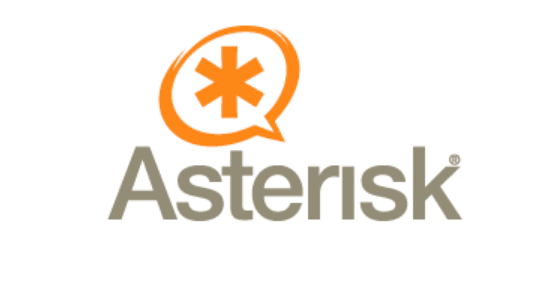

_Ví dụ mở đầu:_

In [2]:
number = ['one', 'two', 'three', 'four', 'five']

print(number)
print(number[0], number[1], number[2], number[3], number[4])

print(*number)

['one', 'two', 'three', 'four', 'five']
one two three four five
one two three four five


### Các trường hợp sử dụng `*` và `**`

* Sử dụng `*` và `**` để truyền đối số cho hàm

* Sử dung `*` và `**` để nắm bắt các đối số được truyền vào một hàm

* Sử dung `*` để chấp nhận các đối số chỉ từ khóa

* Sử dung `*` để unpack iterables trong list/tuple

* Sử dụng `**` để unpack dictionary bên trong các dictionary khác



### 1. Dấu hoa thị `*` cho unpacking trong chức năng gọi hàm

Khi gọi một hàm, toán tử `*` có thể giải nén một intarable bên trong tham số của hàm .

In [3]:
number = ['one', 'two', 'three', 'four', 'five']

print(number)
print(number[0], number[1], number[2], number[3], number[4])

print(*number)

['one', 'two', 'three', 'four', 'five']
one two three four five
one two three four five


In [5]:
def transpose_list(list_of_lists):
    return [
        list(row)
        for row in zip(*list_of_lists)
    ]

transpose_list([[1,2,3],[4,5,6],[7,8,9]])

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]

Cách thực hiện toán tử `**` cũng tương tự toán tự `*` nhưng với đối số arguments.

Toán tử `**` cho phép lấy một từ trong dictionary của cặp từ khóa và giải nén nó trong câu lệnh gọi hàm

In [7]:
date_info = {'year': '2019', 'month':'07', 'day':'29'}

filename = "{year}-{month}-{day}.txt".format(**date_info)

filename

'2019-07-29.txt'

Có thể sử dụng `*` nhiều lần: 

In [8]:
days = ['mon', 'tue', 'wed', 'thu', 'fri']

numbers = [1,2,3,4,5]

print(*numbers, *days)

1 2 3 4 5 mon tue wed thu fri


Tương tự với `**`

In [9]:
date = {'year':'2019', 'month':'08', 'day':'19'}
track = {'artist': "Beethoven", 'title': "Sonat 5"}

filename = "{year}-{month}-{day}-{artist}-{title}.txt".format(**date, **track)

In [10]:
filename

'2019-08-19-Beethoven-Sonat 5.txt'

### 2. Positional arguments with keyword-only arguments

Từ python 3 chúng ta sử dụng cú pháp đặc biệt để chấp nhận các đối số chỉ từ khóa cho các hàm. Đối số chỉ từ khóa là đối số chức năng chỉ có thể chỉ định bằng từ khóa cú pháp nghĩa là chúng không thể được chỉ định theo vị trí. Để nhận các đối số chỉ từ khóa, chúng ta có thể đặt các đối số được đặt tên sau khi sử dụng `*` khi xác định hàm:



In [13]:
def get_multiple(*keys, dictionary, default=None):
    return [
        dictionary.get(key, default)
        for key in keys
    ]

In [14]:
number = {'number 1': 'yellow', 
          'number 2': 'orange', 
          'number 3': 'red'}

get_multiple('number 1', 'number 2', 'number 4', 
             dictionary=number, default='unknown')

['yellow', 'orange', 'unknown']

### 3. Keyword-only arguments without positional arguments

Tính năng một keyword cho argument rất là tuyệt, nhưng trong tình huông muốn yêu cầu đối số chỉ từ khóa mà không nắm bắt được đối số vị trí không giới hạn.

In [15]:
def with_previous(iterable, *, fillvalue=None):
    previous = fillvalue
    for item in iterable:
        yield previous, item
        previous = item

In [16]:
list(with_previous([5,4,3], fillvalue=0))

[(0, 5), (5, 4), (4, 3)]

In [17]:
list(with_previous([5,6,3], 0))

TypeError: with_previous() takes 1 positional argument but 2 were given

### 4. Asterisks in tuple unpacking

In [18]:
number = ['number 1', 'number 2', 'number 3', 'number 4']
first, second, *remain = number
remain

['number 3', 'number 4']

In [19]:
first, *middle, last = number
middle

['number 2', 'number 3']

In [20]:
first, *remain = number
remain

['number 2', 'number 3', 'number 4']

In [21]:
((first_letter, *remain), *other_number) = number


In [24]:
first_letter

'n'

In [22]:
remain

['u', 'm', 'b', 'e', 'r', ' ', '1']

In [23]:
other_number

['number 2', 'number 3', 'number 4']

#### Asterisks in list literals

In [32]:
s = 'asterisk'

In [33]:
#Nhận một chuỗi bất kỳ và trả về một danh sách với chuối ban đầu và chuỗi đảo ngược của nó
def palindromify(sequence):
    return list(sequence) + list(reversed(sequence))

In [34]:
palindromify(s)

['a',
 's',
 't',
 'e',
 'r',
 'i',
 's',
 'k',
 'k',
 's',
 'i',
 'r',
 'e',
 't',
 's',
 'a']

In [35]:
#convert mọi thứ thành danh sách, nối các danh sách rồi return kết quả

def palindromify(sequence):
    return [*sequence[1:], sequence[0]]


In [37]:
palindromify(s)

['s', 't', 'e', 'r', 'i', 's', 'k', 'a']

Sử dụng interables bên trong new tuples or sets.

In [40]:
number = ['number 1', 'number 2', 'number 3', 'number 4']

(*number[1:], number[0])

('number 2', 'number 3', 'number 4', 'number 1')

#### Tạo list từ `*`

In [41]:
uppercase_number = (f.upper() for f in number)
{*number, *uppercase_number}

{'NUMBER 1',
 'NUMBER 2',
 'NUMBER 3',
 'NUMBER 4',
 'number 1',
 'number 2',
 'number 3',
 'number 4'}

In [42]:
set().union(number, uppercase_number)

{'number 1', 'number 2', 'number 3', 'number 4'}

### Double asterisks in dictionary literals

In [44]:
date_info = {'year': "2019", 'month': "07", 'day': "29"}
track_info = {'artist': "Beethoven", 'title': 'Symphony No 5'}

all_info = {**date_info, **track_info}
all_info

{'year': '2019',
 'month': '07',
 'day': '29',
 'artist': 'Beethoven',
 'title': 'Symphony No 5'}

In [45]:
even_info = {**date_info, 'group':'Python Meetup'}
even_info

{'year': '2019', 'month': '07', 'day': '29', 'group': 'Python Meetup'}

In [46]:
new_info = {**even_info, 'day':'20'}
new_info

{'year': '2019', 'month': '07', 'day': '20', 'group': 'Python Meetup'}

### Bài viết được tham khảo từ: 

[AIVIETNAM-summercourse-Week 5-advanced](https://aivietnam.ai/courses/aisummer2019/lessons/asterisk-symbol-in-python/)